In [1]:
from src import data_catalog
from src import tseries_mod
from src.utils_plot import plot_1ds

%matplotlib inline

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['FvPER_DIC', 'FvICE_DIC']
drop_varnames = ['FvPER_DIC', 'FvICE_DIC']
regions = ['Global']

active catalog: experiments


In [3]:
def gen_ocean_virtual_flux(experiment, tracername):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, freq='ann')

    varname_out = '_'.join(['FvTOT', tracername])
    varname_in1 = '_'.join(['FvPER', tracername])
    varname_in2 = '_'.join(['FvICE', tracername])
    ds_ann[varname_out] = ds_ann[varname_in1] + ds_ann[varname_in2]
    for key in ['dtype', '_FillValue', 'missing_value']:
        ds_ann[varname_out].encoding[key] = ds_ann[varname_in1].encoding[key]
    ds_ann[varname_out].attrs['long_name'] = 'total virtual flux, '+tracername

    ds_ann = ds_ann.drop(drop_varnames)

    for region in regions:
        print(ds_ann.mean('time').sel(region=region))
        title = ' '.join([experiment, region])
        plot_1ds(ds_ann, [varname_out], title=title, region_val=region)

    return (ds_ann, varname_out)

def yr_str(ds_ann):
    return '-'.join([f'{ds_ann.time.values[0].year:04d}', f'{ds_ann.time.values[-1].year:04d}'])

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             float32 -0.0004114397
FvTOT_DIC_CESM2_piControl_0001-1500.nc


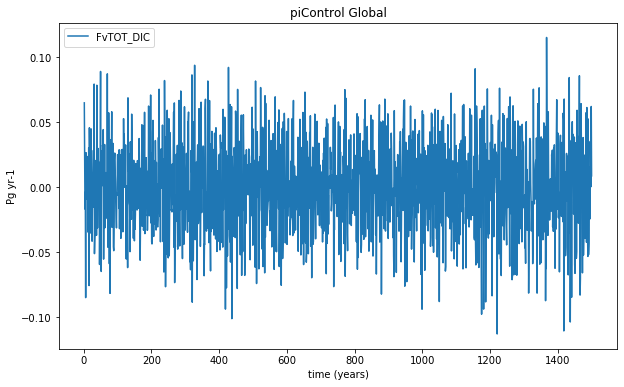

In [4]:
experiment = 'piControl'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               (ensemble: 11)
Coordinates:
    region                <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             (ensemble) float32 -0.0024510757 ... -0.0018457776
FvTOT_DIC_CESM2_historical_1850-2014.nc


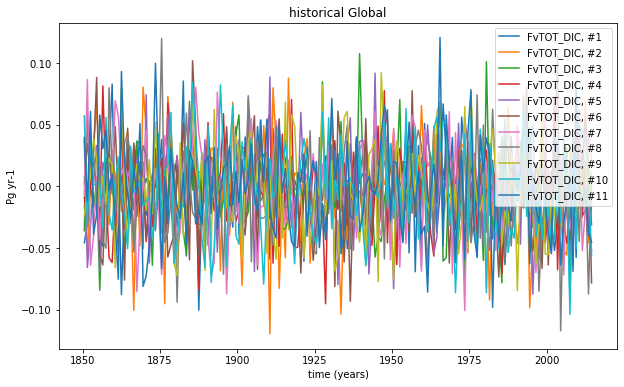

In [5]:
experiment = 'historical'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               (ensemble: 2)
Coordinates:
    region                <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             (ensemble) float32 -0.0049717133 -0.0047476133
FvTOT_DIC_CESM2_ssp585_2015-2100.nc


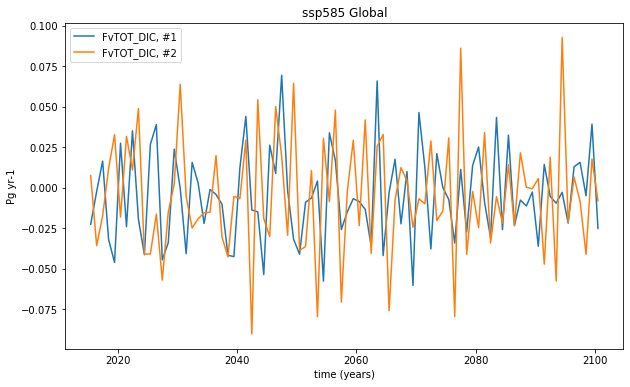

In [6]:
experiment = 'ssp585'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             float32 -0.00021485046
FvTOT_DIC_CESM2-WACCM_piControl_0001-0499.nc


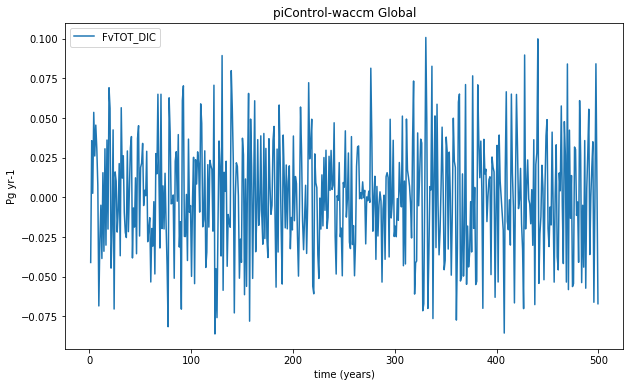

In [7]:
experiment = 'piControl-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'piControl'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               (ensemble: 3)
Coordinates:
    region                <U6 'Global'
Dimensions without coordinates: ensemble
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             (ensemble) float32 -0.00286242 ... -0.0025539352
FvTOT_DIC_CESM2-WACCM_historical_1850-2014.nc


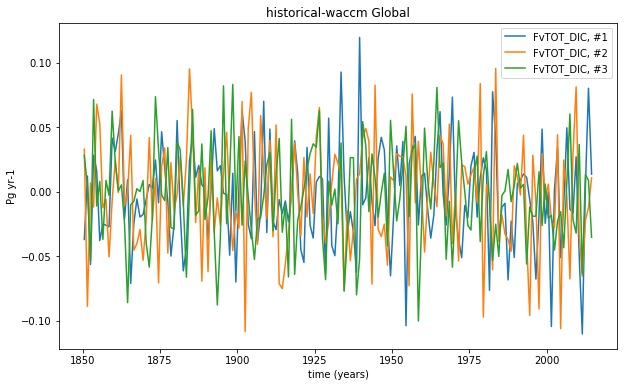

In [8]:
experiment = 'historical-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'historical'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.605e+18
    weight_sum_FvICE_DIC  float64 3.605e+18
    FvTOT_DIC             float32 -0.005601149
FvTOT_DIC_CESM2-WACCM_ssp585_2015-2100.nc


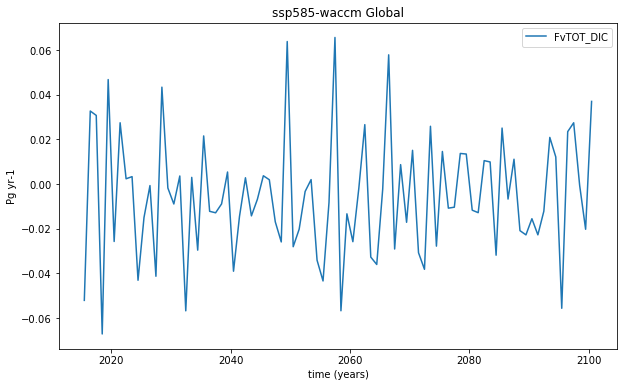

In [9]:
experiment = 'ssp585-waccm'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM2-WACCM'
experiment= 'ssp585'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.611e+18
    weight_sum_FvICE_DIC  float64 3.611e+18
    FvTOT_DIC             float32 -0.00032446402
FvTOT_DIC_CESM1-BGC_piControl_0001-1000.nc


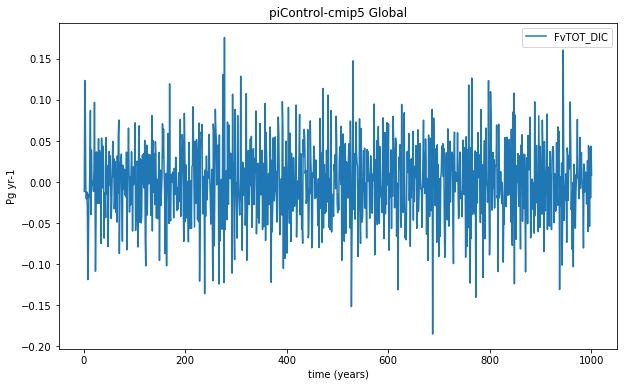

In [10]:
experiment = 'piControl-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'piControl'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.611e+18
    weight_sum_FvICE_DIC  float64 3.611e+18
    FvTOT_DIC             float32 -0.0032121013
FvTOT_DIC_CESM1-BGC_historical_1850-2005.nc


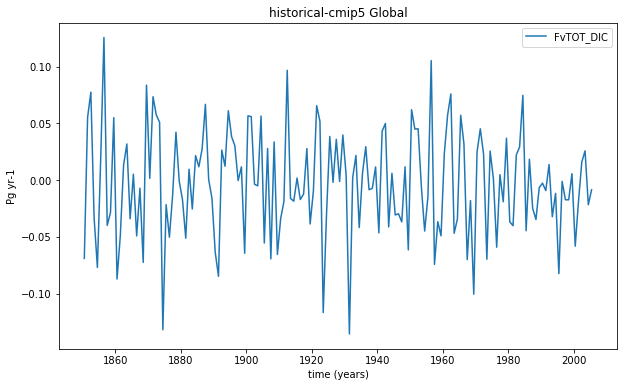

In [11]:
experiment = 'historical-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'historical'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    region                <U6 'Global'
Data variables:
    weight_sum_FvPER_DIC  float64 3.611e+18
    weight_sum_FvICE_DIC  float64 3.611e+18
    FvTOT_DIC             float32 -0.004582211
FvTOT_DIC_CESM1-BGC_rcp85_2005-2100.nc


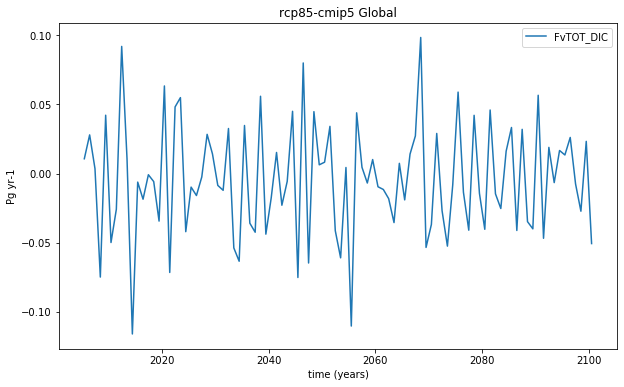

In [12]:
experiment = 'rcp85-cmip5'
tracername = 'DIC'
(ds_ann, varname_out) = gen_ocean_virtual_flux(experiment, tracername)

model = 'CESM1-BGC'
experiment= 'rcp85'
fname_base = '_'.join([varname_out, model, experiment, yr_str(ds_ann)])
fname = '.'.join([fname_base, 'nc'])
print(fname)
ds_ann.to_netcdf(fname, unlimited_dims='time')